# Subsurface Mapping using Python

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import plotly.graph_objects as go

In [2]:
# read the file
df = pd.read_csv('/work/DIG_2021_0016_Bedrock.csv')
df.head()

,Loc_ID,E_10TM83,N_10TM83,Geol_name,KB_masl28,Gd_el_m28,Gd_el_src,El_masl28,Data_src,MD_m,Publisher
0,100160607211W400,711243.82,6120896.30,Bedrock top,644.8,641.3,Original from well log,495.8,Oil & gas well log,145.5,Alberta Geological Survey
1,100160907713W400,691910.46,6170207.23,Bedrock top,679.8,676.5,Original from well log,442.3,Oil & gas well log,234.2,Alberta Geological Survey
2,GJP_interpretative_points_471,659833.16,6269089.08,Bedrock top,-9999.0,386.1,Environment and Sustainable Development DEM,412.6,Outcrop; interpreted from satellite image...,0.0,Alberta Geological Survey
3,GJP_interpretative_points_473,661498.18,6266773.91,Bedrock top,-9999.0,382.0,Environment and Sustainable Development DEM,387.9,Outcrop; interpreted from satellite image...,0.0,Alberta Geological Survey
4,GJP_interpretative_points_474,660354.47,6266310.47,Bedrock top,-9999.0,445.0,Environment and Sustainable Development DEM,451.7,Outcrop; interpreted from satellite image...,0.0,Alberta Geological Survey


In [3]:
# statistics metrics
df.describe()

,E_10TM83,N_10TM83,KB_masl28,Gd_el_m28,El_masl28,MD_m
count,8847.000000,8.847000e+03,8847.000000,8847.000000,8847.000000,8847.000000
mean,731844.131389,6.194465e+06,-426.378874,604.371030,471.766768,135.884074
std,35318.895856,4.753022e+04,3162.680977,100.342252,64.232289,84.630327
min,630225.620000,6.097703e+06,-9999.000000,239.300000,213.300000,0.000000
25%,709237.710000,6.158495e+06,525.500000,556.000000,431.000000,60.000000
50%,739442.310000,6.182733e+06,618.000000,626.300000,470.200000,144.000000
75%,755300.360000,6.236219e+06,682.000000,679.700000,512.000000,200.000000
max,817662.610000,6.298777e+06,837.000000,843.700000,733.000000,360.000000


In [4]:
# show all columns
df.columns

Index([' Loc_ID ', 'E_10TM83', 'N_10TM83', ' Geol_name ', 'KB_masl28',
       'Gd_el_m28', ' Gd_el_src ', 'El_masl28', ' Data_src ', ' MD_m ',
       ' Publisher '],
      dtype='object')

In [5]:
# review the data of the column ' Loc_ID '
df[' Loc_ID ']

0                    100160607211W400
1                    100160907713W400
2       GJP_interpretative_points_471
3       GJP_interpretative_points_473
4       GJP_interpretative_points_474
                    ...              
8842               250k_contour_49427
8843               250k_contour_58801
8844               250k_contour_58554
8845               250k_contour_40753
8846               250k_contour_49420
Name:  Loc_ID , Length: 8847, dtype: object

In [6]:
# rename columns
df.rename(columns={' Loc_ID ':'Loc_ID','E_10TM83': 'Easting','N_10TM83': 'Northing','El_masl28':'Elevation',' Geol_name ':'Geol_name'  }, inplace=True)
df

,Loc_ID,Easting,Northing,Geol_name,KB_masl28,Gd_el_m28,Gd_el_src,Elevation,Data_src,MD_m,Publisher
0,100160607211W400,711243.82,6120896.30,Bedrock top,644.8,641.3,Original from well log,495.8,Oil & gas well log,145.5,Alberta Geological Survey
1,100160907713W400,691910.46,6170207.23,Bedrock top,679.8,676.5,Original from well log,442.3,Oil & gas well log,234.2,Alberta Geological Survey
2,GJP_interpretative_points_471,659833.16,6269089.08,Bedrock top,-9999.0,386.1,Environment and Sustainable Development DEM,412.6,Outcrop; interpreted from satellite image...,0.0,Alberta Geological Survey
3,GJP_interpretative_points_473,661498.18,6266773.91,Bedrock top,-9999.0,382.0,Environment and Sustainable Development DEM,387.9,Outcrop; interpreted from satellite image...,0.0,Alberta Geological Survey
4,GJP_interpretative_points_474,660354.47,6266310.47,Bedrock top,-9999.0,445.0,Environment and Sustainable Development DEM,451.7,Outcrop; interpreted from satellite image...,0.0,Alberta Geological Survey
...,...,...,...,...,...,...,...,...,...,...,...
8842,250k_contour_49427,717677.79,6127510.25,Bedrock top,-9999.0,653.3,Geological Framework DEM,570.0,Control point (interpreted),83.3,Alberta Geological Survey
8843,250k_contour_58801,784729.65,6250759.81,Bedrock top,-9999.0,457.7,Geological Framework DEM,450.0,Control point (interpreted),7.7,Alberta Geological Survey
8844,250k_contour_58554,795191.40,6242083.93,Bedrock top,-9999.0,488.5,Geological Framework DEM,460.0,Control point (interpreted),28.5,Alberta Geological Survey
8845,250k_contour_40753,675421.90,6205269.88,Bedrock top,-9999.0,590.0,Geological Framework DEM,550.0,Control point (interpreted),40.0,Alberta Geological Survey


In [7]:
# see how many unique elements are in the column: 'Geol_name'
df['Geol_name'].unique()

array([' Bedrock  top ', ' First  White  Specks  Member  top ',
       ' Fish  Scales  Formation  base ', ' Pelican  Formation  top ',
       ' Viking  or  Pelican  Formation  top ',
       ' Joli  Fou  Formation  or  Harmon  Member  top '], dtype=object)

In [8]:
# Create a new dataframe filtered with the value ' Bedrock  top ' from column 'Geol_name' 
bedrock = df.loc[df['Geol_name'] == ' Bedrock  top '][['Easting','Northing','Elevation']]
bedrock

,Easting,Northing,Elevation
0,711243.82,6120896.30,495.8
1,691910.46,6170207.23,442.3
2,659833.16,6269089.08,412.6
3,661498.18,6266773.91,387.9
4,660354.47,6266310.47,451.7
...,...,...,...
8842,717677.79,6127510.25,570.0
8843,784729.65,6250759.81,450.0
8844,795191.40,6242083.93,460.0
8845,675421.90,6205269.88,550.0


## Create a basic contour graph

In [9]:
# create a surface from scratch
numx, numy = (20,20)
xx =np.linspace(-1,1,numx)
yy = np.linspace(-1,1,numy)

### numpy meshgrid function
The numpy.meshgrid function is used to create a rectangular grid out of two given one-dimensional arrays representing the Cartesian indexing or Matrix indexing. Meshgrid function is somewhat inspired from MATLAB.

In [10]:
# plot the surface
xv,yv = np.meshgrid(xx,yy)
xv.shape

(20, 20)

In [11]:
# create z value (z, attribute)
zv = xv ** 2 + yv ** 2

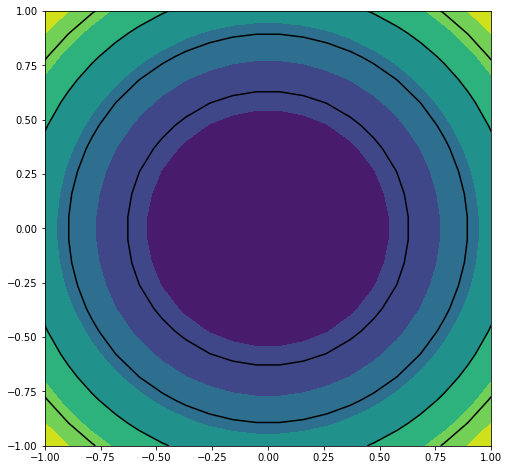

In [12]:
# create a figure
fig1 = plt.figure(figsize=(8,8))
plt.contour(xv,yv,zv, levels=5, colors='black')
# contour filled
plt.contourf(xv,yv,zv, levels=6)
plt.show()

In [13]:
# use a library
import matplotlib.cm as cm

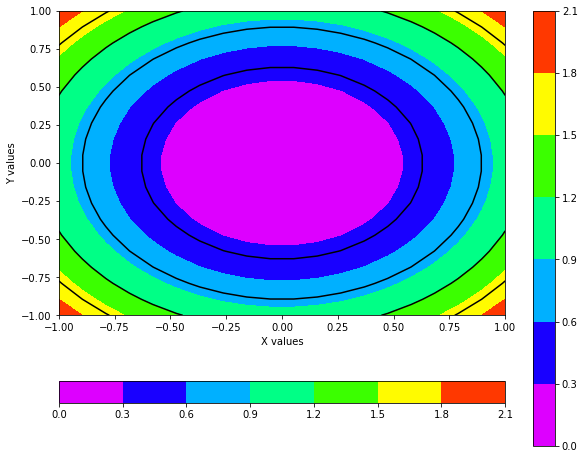

In [14]:
# create a figure
fig1 = plt.figure(figsize=(10,8))
plt.contour(xv,yv,zv, levels=5, colors='black')
# contour filled
im = plt.contourf(xv,yv,zv, levels=6, cmap = cm.gist_rainbow_r)
#provide limits
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.colorbar(im)
# set an horizontal colobar
plt.colorbar(im, orientation='horizontal')
plt.show()

## Create a 3D figure

### Anticline Model

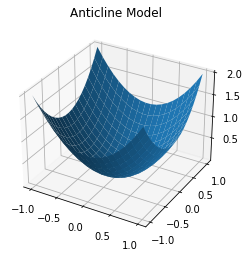

In [15]:
fig2 = plt.figure()
ax = plt.axes(projection='3d')
# plot a surface in 3D
ax.plot_surface(xv,yv,zv)
plt.title('Anticline Model')
plt.show()

### Sincline Model

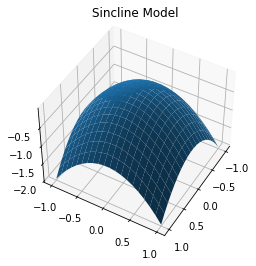

In [16]:
fig3 = plt.figure()
ax = plt.axes(projection='3d')
# plot a surface in 3D
ax.plot_surface(xv,yv,-zv)
plt.title('Sincline Model')
#select the view angle
ax.view_init(45,30)# (angles)
plt.show()

## Create contour map in 3D

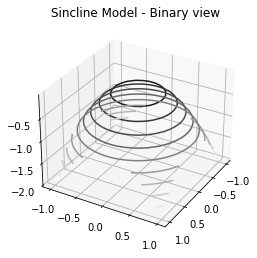

In [17]:
fig4 = plt.figure()
ax = plt.axes(projection='3d')
# plot a surface in 3D
##ax.plot_surface(xv,yv,-zv)
##ax.contour3D(xv,yv,-zv)
ax.contour3D(xv,yv,-zv, levels=10, cmap='binary')
plt.title('Sincline Model - Binary view')
#select the view angle
ax.view_init(30,30)# (angles)
plt.show()

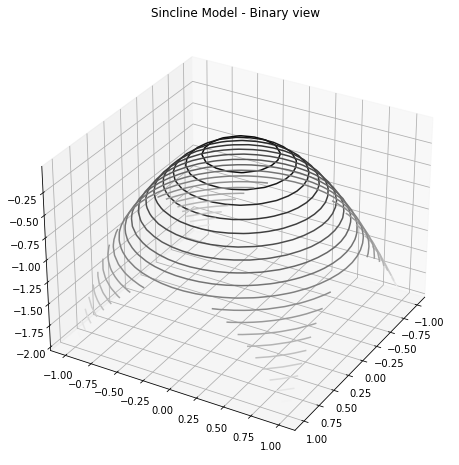

In [18]:
# modify size
fig5 = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
# plot a surface in 3D
##ax.plot_surface(xv,yv,-zv)
##ax.contour3D(xv,yv,-zv)
ax.contour3D(xv,yv,-zv, levels=20, cmap='binary')
plt.title('Sincline Model - Binary view')
#select the view angle
ax.view_init(30,30)# (angles)
plt.show()

## Create a contour map with the dataframe values

In [19]:
# Apply quality
bedrock.loc[bedrock['Elevation'] == -9999.0]
# this means that in bedrock surface does not exist mising values
# module .loc provides the cel location buscar

,Easting,Northing,Elevation


### Create a scatter plot to visualize the data of the dataframe bedrock

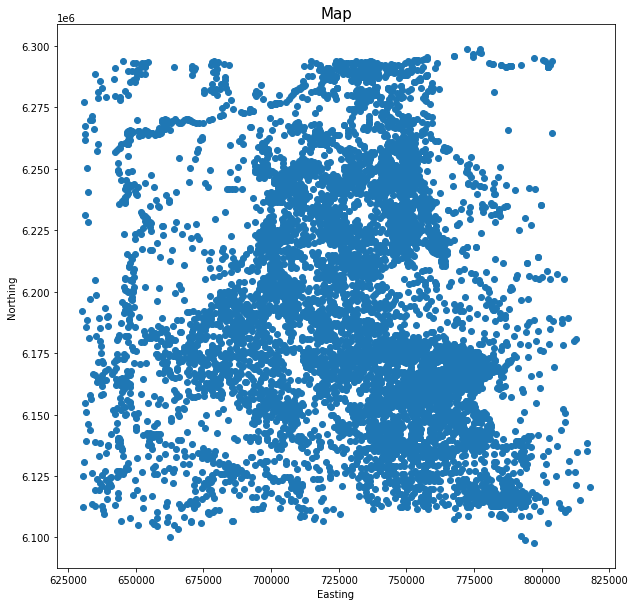

In [20]:
# Create a scatter plot with the values of bedrock dataframe
plt.figure(figsize=(10,10))
plt.scatter(bedrock.Easting, bedrock.Northing)
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('Map', fontsize=15)
plt.show()

### Coloring dots in base of elevation values

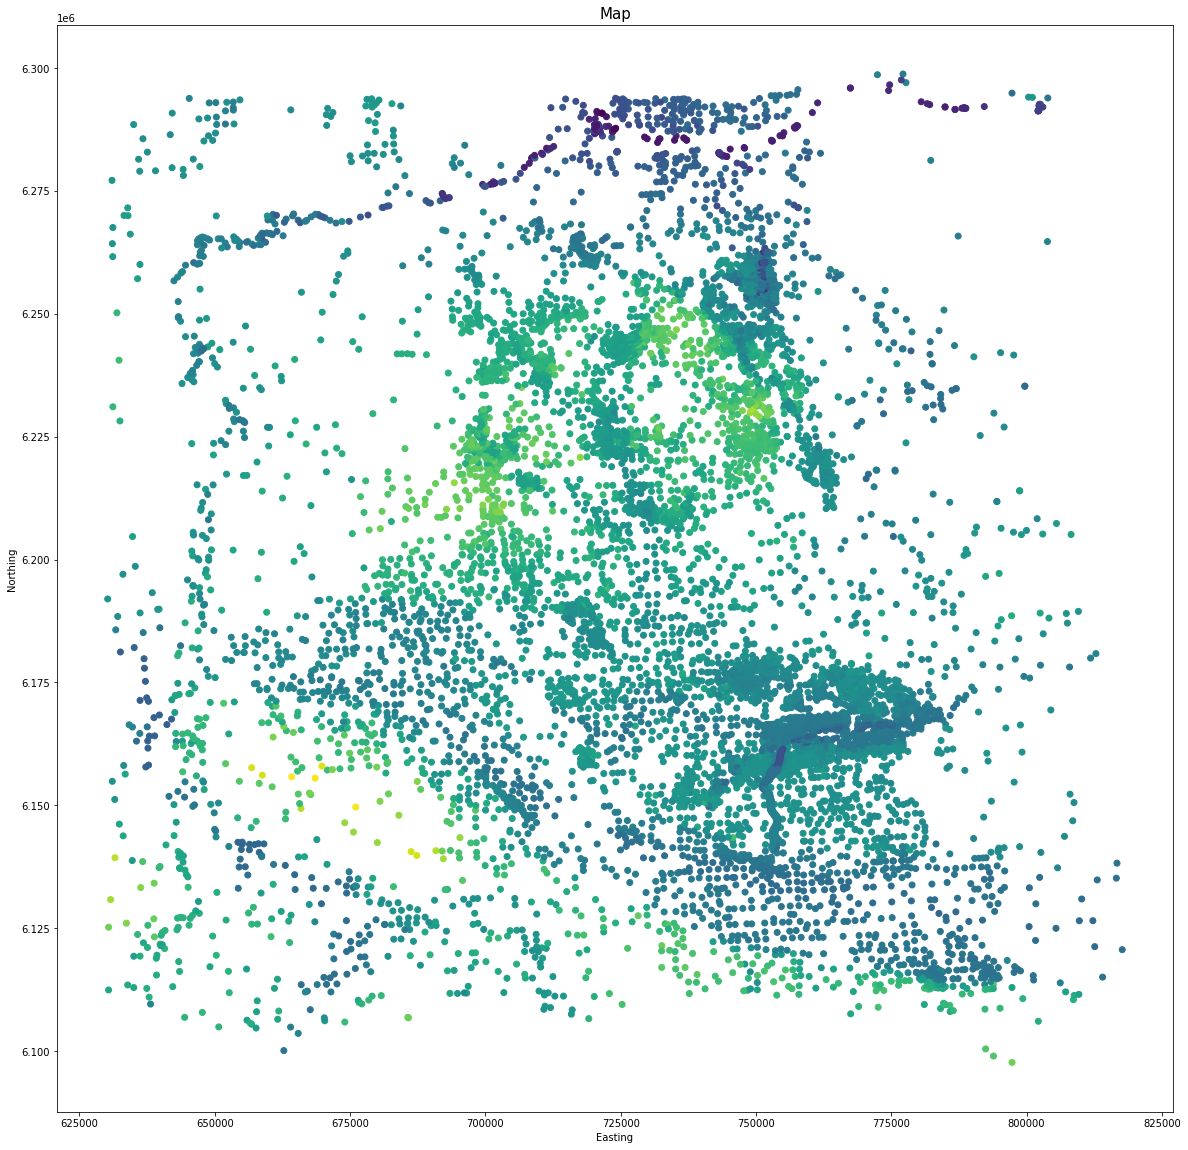

In [21]:
# Create a scatter plot with the values of bedrock dataframe
plt.figure(figsize=(20,20))
plt.scatter(bedrock.Easting, bedrock.Northing, c=bedrock.Elevation)
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('Map', fontsize=15)
plt.show()

### Create a function to crop the dataframe bedrock

In [22]:
def crop(dataframe, x_min,x_max,y_min,y_max):
    dataframe = dataframe.loc[(dataframe['Easting'] <= x_max) & (dataframe['Easting'] >= x_min)]
    dataframe = dataframe.loc[(dataframe['Northing'] <= y_max) & (dataframe['Northing'] >= y_min)]
    return dataframe

In [23]:
x_min,x_max,y_min,y_max = 750000,790000,6115896,6155896

In [24]:
cropped_df = crop(bedrock,x_min,x_max,y_min,y_max)
cropped_df.describe()

,Easting,Northing,Elevation
count,735.000000,7.350000e+02,735.000000
mean,763997.603442,6.139602e+06,435.599320
std,11330.162313,1.161519e+04,32.800306
min,750033.970000,6.115939e+06,383.000000
25%,753309.415000,6.132555e+06,410.000000
50%,761375.200000,6.141696e+06,423.000000
75%,773602.335000,6.149198e+06,470.000000
max,789914.660000,6.155878e+06,581.000000


### Create a scatter plot to visualize the data of the dataframe cropped_df

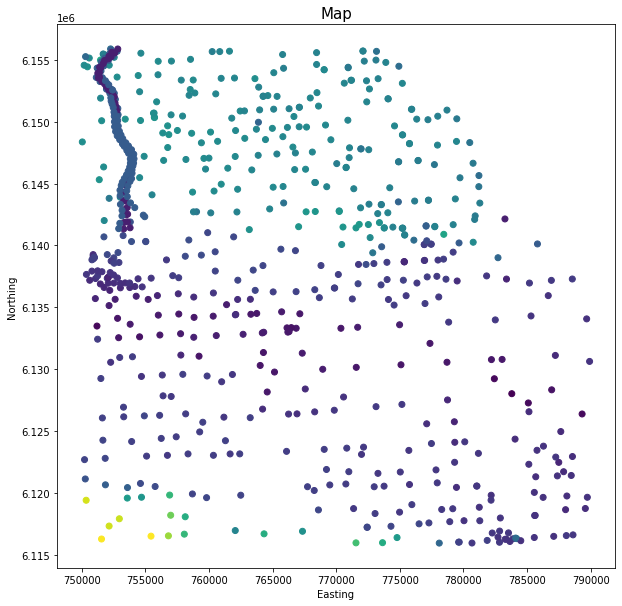

In [26]:
# Create a scatter plot with the values of bedrock dataframe
plt.figure(figsize=(10,10))
plt.scatter(cropped_df.Easting, cropped_df.Northing, c=cropped_df.Elevation)
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('Map', fontsize=15)
plt.show()

### Create a mesh grid to plot dataframe cropped_df

In [28]:
# define dimensions of the grid
ngridx = 200
ngridy = 200

In [31]:
# interpolate, values
# import library
import matplotlib.tri as tri
triang = tri.Triangulation(cropped_df.Easting, cropped_df.Northing)

In [34]:
# interpolate z -> Elevation values
interpolator = tri.LinearTriInterpolator(triang, cropped_df.Elevation)


In [35]:
#
xi = np.linspace(x_min,x_max,ngridx)
yi = np.linspace(y_min,y_max,ngridy)
Xi, Yi = np.meshgrid(xi,yi)

In [38]:
zi = interpolator(Xi,Yi)

In [41]:
#verify dimensions of the grid
#zi.shape
#Xi.shape
Yi.shape


(200, 200)

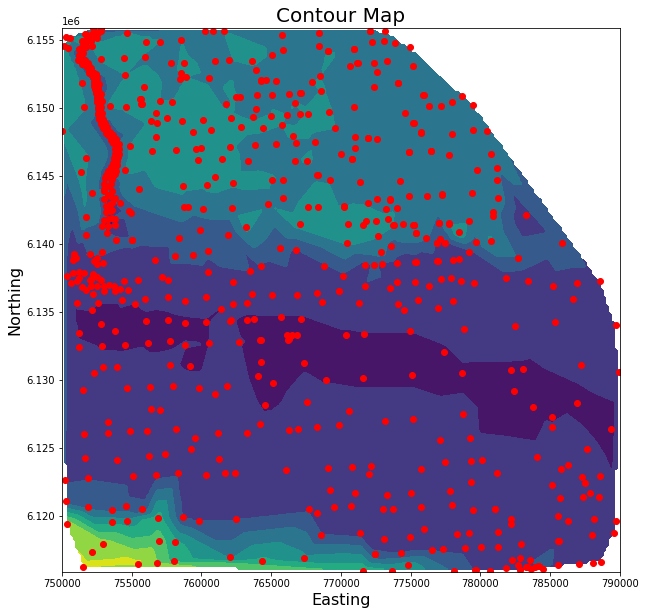

In [48]:
# plot the dataframe
plt.figure(figsize=[10,10])
plt.contourf(Xi,Yi,zi)
plt.title('Contour Map', fontsize=20)
plt.scatter(cropped_df.Easting,cropped_df.Northing, c='red')
plt.xlabel('Easting', fontsize=16)
plt.ylabel('Northing', fontsize=16)
#plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=22e90012-8c1c-4fa6-bf22-3fab8d76a457' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>